
## 데이터 EDA 

In [2]:
from collections import Counter
from datetime import timedelta, datetime, date
import glob
from itertools import chain
import json
import os
import re

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = '/Users/seungmi/Library/Android/sdk/platforms/android-29/data/fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)
plt.rcParams["figure.figsize"] = (20, 10)
register_matplotlib_converters()

In [5]:
directory = 'data/'

## 1. Data Read

### a. Magazine.json

In [6]:
magazine = pd.read_json(directory + 'magazine.json', lines=True)

In [7]:
magazine.shape

(27967, 2)

In [8]:
magazine.head()

,magazine_tag_list,id
0,"[브런치북, 육아일기, 대화법, 들려주고픈이야기]",38842
1,"[tea, food]",11540
2,[food],11541
3,"[브런치북, 일상, 시, 사람]",11546
4,"[감성에세이, 노래, 음악에세이]",11544


### b. Metadata.json

In [9]:
metadata = pd.read_json(directory + 'metadata.json', lines=True)

In [10]:
metadata.shape

(643104, 9)

In [11]:
metadata.head()

,magazine_id,user_id,title,keyword_list,display_url,sub_title,reg_ts,article_id,id
0,8982,@bookdb,"사진으로 옮기기에도 아까운, 리치필드 국립공원","[여행, 호주, 국립공원]",https://brunch.co.kr/@bookdb/782,세상 어디에도 없는 호주 Top 10,1474944427000,782,@bookdb_782
1,12081,@kohwang56,[시] 서러운 봄,"[목련꽃, 아지랑이, 동행]",https://brunch.co.kr/@kohwang56/81,,1463092749000,81,@kohwang56_81
2,0,@hannahajink,무엇을 위해,[],https://brunch.co.kr/@hannahajink/4,무엇 때문에,1447997287000,4,@hannahajink_4
3,16315,@bryceandjuli,싫다,"[감정, 마음, 위로]",https://brunch.co.kr/@bryceandjuli/88,,1491055161000,88,@bryceandjuli_88
4,29363,@mijeongpark,Dubliner#7,"[유럽여행, 더블린, 아일랜드]",https://brunch.co.kr/@mijeongpark/34,#7. 내 친구의 집은 어디인가,1523292942000,34,@mijeongpark_34


In [12]:
len(pd.Series.unique(metadata['magazine_id']))

28028

In [13]:
#  pd.read_json(directory + '/contents/data.6', lines=True)

### c. Users.json

In [14]:
users = pd.read_json(directory + '/users.json', lines=True)

In [15]:
users.shape

(310758, 3)

In [16]:
users.head()

,keyword_list,following_list,id
0,[],"[@perytail, @brunch]",#901985d8bc4c481805c4a4f911814c4a
1,[],"[@holidaymemories, @wadiz, @sciforus, @dailydu...",#1fd89e9dcfa64b45020d9eaca54e0eed
2,[],"[@commerceguy, @sunsutu, @kakao-it, @joohoonja...",#1d94baaea71a831e1f33e1c6bd126ed5
3,[],"[@amberjeon48, @forsy20, @nemotokki, @hawann, ...",#04641c01892b12dc018b1410e4928c0d
4,[],"[@dwcha7342, @iammento, @kakao-it, @dkam, @ant...",#65bcaff862aadff877e461f54187ab62


### d. Read Files

In [17]:
read_file_lst = glob.glob(directory+'read/*')

In [18]:
exclude_file_lst = ['read.tar']

In [19]:
read_df_lst = []
for f in read_file_lst:
    file_name = os.path.basename(f)
    if file_name in exclude_file_lst:
        print(file_name)
    else:
        df_temp = pd.read_csv(f, header=None, names=['raw'])
        df_temp['dt'] = file_name[:8]
        df_temp['hr'] = file_name[8:10]
        df_temp['user_id'] = df_temp['raw'].str.split(' ').str[0]
        df_temp['article_id'] = df_temp['raw'].str.split(' ').str[1:].str.join(' ').str.strip()
        read_df_lst.append(df_temp)

In [20]:
read = pd.concat(read_df_lst)

In [21]:
read.shape

(3507097, 5)

In [22]:
read.head()

,raw,dt,hr,user_id,article_id
0,#a055d0c3520e1c002531001928217887 @charlessay_...,20181121,14,#a055d0c3520e1c002531001928217887,@charlessay_30 @wal8am_27 @uglyduckmin_40 @ant...
1,#a9cba8bf098c149170315d4cd8d3082e @jinbread_88...,20181121,14,#a9cba8bf098c149170315d4cd8d3082e,@jinbread_88 @jinbread_87 @jinbread_89
2,#207c8cb590a843e247b9fe7fdd0e5281 @sangheeshyn...,20181121,14,#207c8cb590a843e247b9fe7fdd0e5281,@sangheeshyn_66
3,#d76887a5b30adbf793f742c6f67b57bd @tenbody_150...,20181121,14,#d76887a5b30adbf793f742c6f67b57bd,@tenbody_1506 @tenbody_1506
4,#b260d83247a4d9e3b22143c950f7f471 @maumdal_257...,20181121,14,#b260d83247a4d9e3b22143c950f7f471,@maumdal_257 @maumdal_257


#### 탐색하기 좋은 데이터 포맷으로 변경

In [23]:
def chainer(s):
    return list(chain.from_iterable(s.str.split(' ')))

In [24]:
read_cnt_by_user = read['article_id'].str.split(' ').map(len)

In [25]:
read_raw = pd.DataFrame({'dt': np.repeat(read['dt'], read_cnt_by_user),
                         'hr': np.repeat(read['hr'], read_cnt_by_user),
                         'user_id': np.repeat(read['user_id'], read_cnt_by_user),
                         'article_id': chainer(read['article_id'])})

In [26]:
read_raw.shape

(22110706, 4)

In [27]:
read_raw.head()

,dt,hr,user_id,article_id
0,20181121,14,#a055d0c3520e1c002531001928217887,@charlessay_30
0,20181121,14,#a055d0c3520e1c002531001928217887,@wal8am_27
0,20181121,14,#a055d0c3520e1c002531001928217887,@uglyduckmin_40
0,20181121,14,#a055d0c3520e1c002531001928217887,@anti-essay_133
0,20181121,14,#a055d0c3520e1c002531001928217887,@roysday_125


In [28]:
print("전체 데이터 건수:", read_raw.shape)
print("중복 소비를 제외한 데이터 건수:", read_raw[['user_id', 'article_id']].drop_duplicates().shape)
print("Unique 독자 수:", len(read_raw['user_id'].unique()))
print("소비된 Unique 글 수:", len(read_raw['article_id'].unique()))

전체 데이터 건수: (22110706, 4)
중복 소비를 제외한 데이터 건수: (12597878, 2)
Unique 독자 수: 306222
소비된 Unique 글 수: 505841


# 2. Prepocessing

### a. metadata 전처리

In [92]:
atc = metadata.copy()

In [93]:
atc['reg_datetime'] = atc['reg_ts'].apply(lambda x : datetime.fromtimestamp(x/1000.0))
atc.loc[atc['reg_datetime'] == atc['reg_datetime'].min(), 'reg_datetime'] = datetime(2090, 12, 31)
atc['reg_dt'] = atc['reg_datetime'].dt.date
atc['type'] = atc['magazine_id'].apply(lambda x : '개인' if x == 0.0 else '매거진')

In [94]:
# 컬럼명 변경
atc.columns = ['magazine_id', 'author_id',  'title', 'keyword_list', 'display_url', 
               'sub_title', 'reg_ts', 'id', 'article_id', 'reg_datetime', 
               'reg_dt', 'type']

In [95]:
atc.head()

,magazine_id,author_id,title,keyword_list,display_url,sub_title,reg_ts,id,article_id,reg_datetime,reg_dt,type
0,8982,@bookdb,"사진으로 옮기기에도 아까운, 리치필드 국립공원","[여행, 호주, 국립공원]",https://brunch.co.kr/@bookdb/782,세상 어디에도 없는 호주 Top 10,1474944427000,782,@bookdb_782,2016-09-27 11:47:07,2016-09-27,매거진
1,12081,@kohwang56,[시] 서러운 봄,"[목련꽃, 아지랑이, 동행]",https://brunch.co.kr/@kohwang56/81,,1463092749000,81,@kohwang56_81,2016-05-13 07:39:09,2016-05-13,매거진
2,0,@hannahajink,무엇을 위해,[],https://brunch.co.kr/@hannahajink/4,무엇 때문에,1447997287000,4,@hannahajink_4,2015-11-20 14:28:07,2015-11-20,개인
3,16315,@bryceandjuli,싫다,"[감정, 마음, 위로]",https://brunch.co.kr/@bryceandjuli/88,,1491055161000,88,@bryceandjuli_88,2017-04-01 22:59:21,2017-04-01,매거진
4,29363,@mijeongpark,Dubliner#7,"[유럽여행, 더블린, 아일랜드]",https://brunch.co.kr/@mijeongpark/34,#7. 내 친구의 집은 어디인가,1523292942000,34,@mijeongpark_34,2018-04-10 01:55:42,2018-04-10,매거진


In [33]:
atc_read_cnt = read_raw[read_raw.article_id != ''].groupby('article_id')['user_id'].count()

In [34]:
atc_read_cnt = atc_read_cnt.reset_index()
atc_read_cnt.columns = ['article_id', 'read_cnt']

In [35]:
atc_read_cnt.dropna(subset=['article_id'], inplace = True)
# metadata를 찾을 수 없는 소비 로그 제외
atc_read_cnt_nn = atc_read_cnt[atc_read_cnt['article_id'].notnull()]

In [36]:
# 소비수 기준 분류값
def get_class(x):
    if x >= 142:
        result = '5%'
    elif x >= 72:
        result = '10%'
    elif x >= 25:
        result = '25%'
    elif x >= 8:
        result = '50%'
    elif x >= 3:
        result = '75%'
    else:
        result = '100%'
    return result

In [37]:
atc_read_cnt_nn['class'] = atc_read_cnt_nn['read_cnt'].map(get_class)


### b.  read 데이터 전처리

In [38]:
off_data = pd.merge(read_raw, atc, how='inner', left_on='article_id', right_on='article_id')

In [39]:
off_data.shape

(20905040, 15)

In [40]:
off_data.columns

Index(['dt', 'hr', 'user_id', 'article_id', 'magazine_id', 'author_id',
       'title', 'keyword_list', 'display_url', 'sub_title', 'reg_ts', 'id',
       'reg_datetime', 'reg_dt', 'type'],
      dtype='object')

In [41]:
off_data.columns = ['read_dt', 'hr', 'user_id', 'article_id', 'magazine_id', 'author_id',
       'title', 'keyword_list', 'display_url', 'sub_title', 'reg_ts', 'id',
       'reg_datetime', 'reg_dt', 'type']

In [42]:
off_data = off_data[['read_dt', 'user_id', 'article_id', 'title', 'sub_title', 'author_id', 'reg_dt', 'type', 'display_url', 'keyword_list', 'magazine_id']]

In [43]:
off_data['read_dt'] = pd.to_datetime(off_data['read_dt'], format='%Y%m%d')
off_data['reg_dt'] = pd.to_datetime(off_data['reg_dt'], format='%Y-%m-%d')
off_data['off_day'] = (off_data['read_dt'] - off_data['reg_dt']).dt.days

일단 기본 작업은 off_data로 해보기

In [44]:
# meatadata와 join
off_data = pd.merge(off_data, atc_read_cnt_nn[['article_id', 'read_cnt', 'class']], 
                    how='left', left_on='article_id', right_on='article_id')


In [45]:
off_data.shape

(20905040, 14)

In [46]:
off_data.head()

,read_dt,user_id,article_id,title,sub_title,author_id,reg_dt,type,display_url,keyword_list,magazine_id,off_day,read_cnt,class
0,2018-11-21,#a055d0c3520e1c002531001928217887,@charlessay_30,프랑스 인큐베이팅 프로그램 킥오프(2),자신의 비전을 이루기 위해 여행을 떠나는 길동무들,@charlessay,2018-11-18,매거진,https://brunch.co.kr/@charlessay/30,"[IT, 스타트업]",37242,3,31,25%
1,2018-11-18,#585b5346c56d6d0ed6341afe382e03b7,@charlessay_30,프랑스 인큐베이팅 프로그램 킥오프(2),자신의 비전을 이루기 위해 여행을 떠나는 길동무들,@charlessay,2018-11-18,매거진,https://brunch.co.kr/@charlessay/30,"[IT, 스타트업]",37242,0,31,25%
2,2018-11-18,#ad179b8f764c4c56f048ba337daee781,@charlessay_30,프랑스 인큐베이팅 프로그램 킥오프(2),자신의 비전을 이루기 위해 여행을 떠나는 길동무들,@charlessay,2018-11-18,매거진,https://brunch.co.kr/@charlessay/30,"[IT, 스타트업]",37242,0,31,25%
3,2018-11-19,#3cb3edc483bc5d9bd95b677b97a3521c,@charlessay_30,프랑스 인큐베이팅 프로그램 킥오프(2),자신의 비전을 이루기 위해 여행을 떠나는 길동무들,@charlessay,2018-11-18,매거진,https://brunch.co.kr/@charlessay/30,"[IT, 스타트업]",37242,1,31,25%
4,2018-11-22,#e714f32a816fd9c8e553cd7a7573b71c,@charlessay_30,프랑스 인큐베이팅 프로그램 킥오프(2),자신의 비전을 이루기 위해 여행을 떠나는 길동무들,@charlessay,2018-11-18,매거진,https://brunch.co.kr/@charlessay/30,"[IT, 스타트업]",37242,4,31,25%


In [47]:
# 유져별 방문일수, 글 소비수
grp_by_user = off_data.groupby('user_id').agg({'read_dt':['nunique', 'count']})
grp_by_user = grp_by_user.reset_index()
grp_by_user.columns = ['user_id', 'visit_day_cnt', 'read_cnt']

In [48]:
grp_by_user['visit_day_cnt'].describe()

count    303047.000000
mean          7.242748
std          13.363423
min           1.000000
25%           1.000000
50%           3.000000
75%           7.000000
max         151.000000
Name: visit_day_cnt, dtype: float64

75% 의 유저가 7회 이하 방문함

Text(0.5, 0, '방문일수')

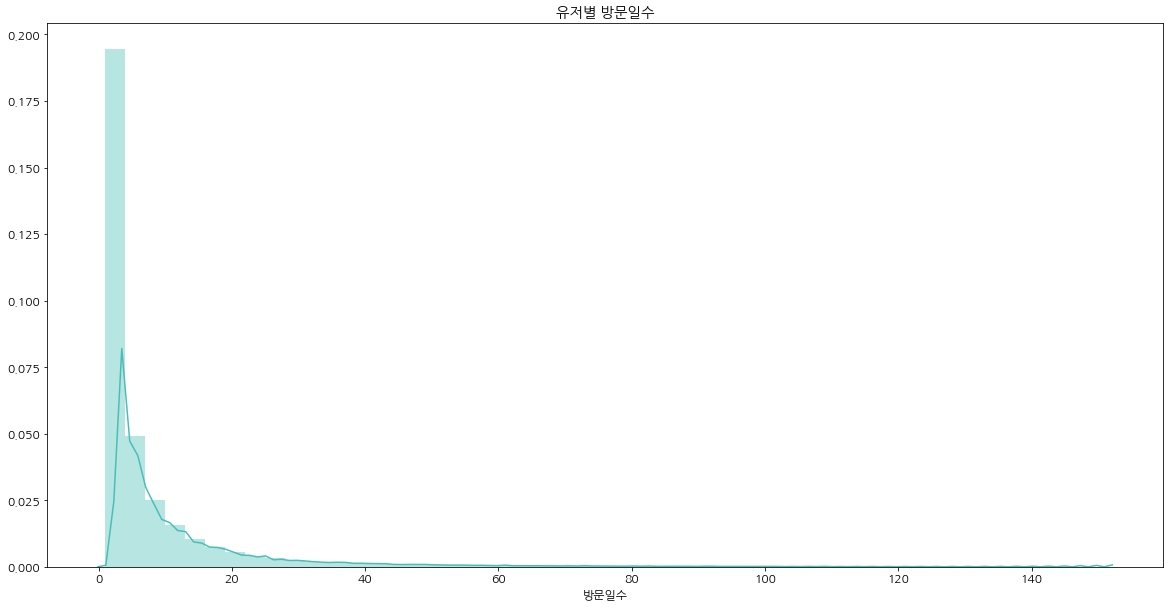

In [49]:
sns.distplot(grp_by_user["visit_day_cnt"], color='#49beb7')
plt.title('유저별 방문일수')
plt.xlabel('방문일수')

In [50]:
low_visit_user = grp_by_user.loc[grp_by_user['visit_day_cnt'] <=7, 'user_id']

In [51]:
upp_visit_user = grp_by_user.loc[grp_by_user['visit_day_cnt'] >=75, 'user_id']

In [52]:
low_visit_user.shape, upp_visit_user.shape

((230315,), (2738,))

In [53]:
off_data_l = off_data[off_data.user_id.isin(low_visit_user)]
off_data_u = off_data[off_data.user_id.isin(upp_visit_user)]

In [54]:
off_data.shape, off_data_l.shape, off_data_u.shape

((20905040, 14), (3384484, 14), (5002114, 14))

### Tell the user is active (latest visit)

18년 10월 - 19년 3월까지 6개월의 read 기록. 몇개월 이상 방문하지 않아야 inactive로 볼 것인가?

아니다 좀 애매한듯. 6개월

### Most common keywords

In [55]:
keywords_cnt = pd.Series([item for sublist in atc.keyword_list for item in sublist])

In [106]:
keywords_cnt.value_counts().shape  # 86037개

(86037,)

In [56]:
keywords_cnt.value_counts().head(15)

여행       33887
영화       27058
사랑       25177
에세이      17629
그림일기     15806
생각       14254
공감에세이    13109
일상       11175
글쓰기      10086
감성에세이    10021
인생        8929
행복        8472
연애        7819
소설        7734
드로잉       7721
dtype: int64

브런치 특징 딱 나오네

### Similarities between articles (based on keywords)

jaccard similarity (since we do not care duplicated keywords. if not, cosine similarity would be preferred)

In [57]:
def get_jaccard_sim(list1, list2): 
    c = set(list1).intersection(list2)
    return float(len(c)) / (len(list1) + len(list2) - len(c))

In [58]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
def get_cosine_sim(*strs): 
    vectors = [t for t in get_vectors(*strs)]
    return cosine_similarity(vectors)
    
def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

### Clusters based on keywords

https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [97]:
atc['keyword_list']=atc['keyword_list'].apply(lambda x: " ".join(x) )

In [98]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000
)
tfidf.fit(atc.keyword_list)
text = tfidf.transform(atc.keyword_list)

In [99]:
def find_optimal_clusters(data, max_k):
    iters = range(10, max_k+1, 10)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')


Fit 10 clusters
Fit 20 clusters
Fit 30 clusters
Fit 40 clusters
Fit 50 clusters
Fit 60 clusters
Fit 70 clusters
Fit 80 clusters
Fit 90 clusters
Fit 100 clusters
Fit 110 clusters
Fit 120 clusters
Fit 130 clusters
Fit 140 clusters
Fit 150 clusters
Fit 160 clusters
Fit 170 clusters
Fit 180 clusters
Fit 190 clusters
Fit 200 clusters
Fit 210 clusters
Fit 220 clusters
Fit 230 clusters
Fit 240 clusters
Fit 250 clusters
Fit 260 clusters
Fit 270 clusters
Fit 280 clusters
Fit 290 clusters
Fit 300 clusters


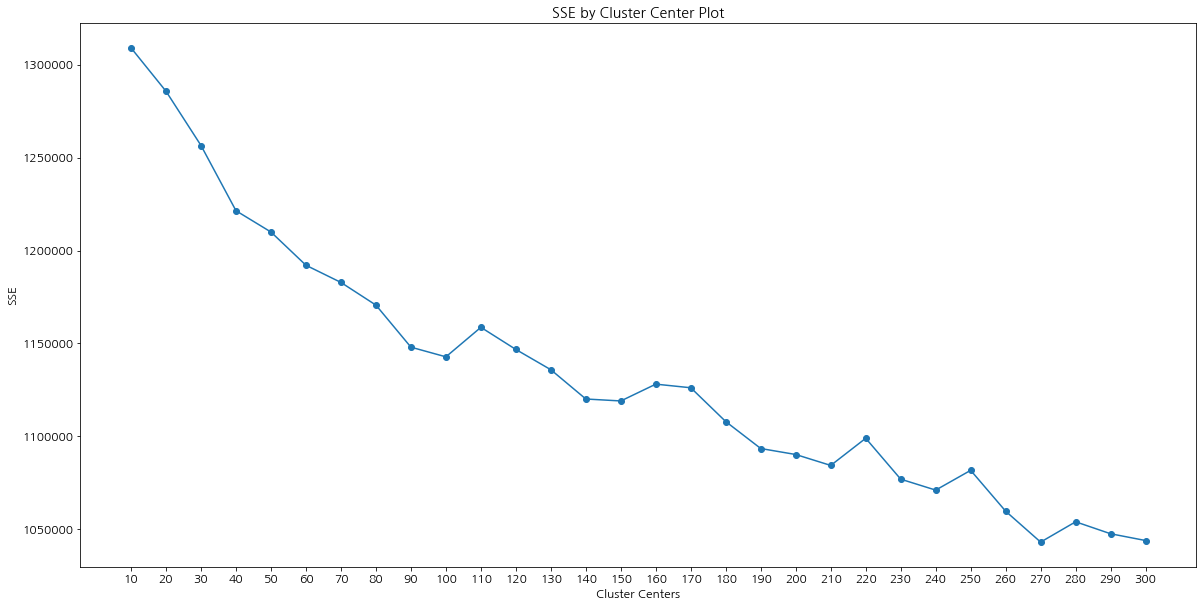

In [100]:
    
find_optimal_clusters(text, 300)


In [101]:
clusters = MiniBatchKMeans(n_clusters=300, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

/Users/seungmi/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungmi/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


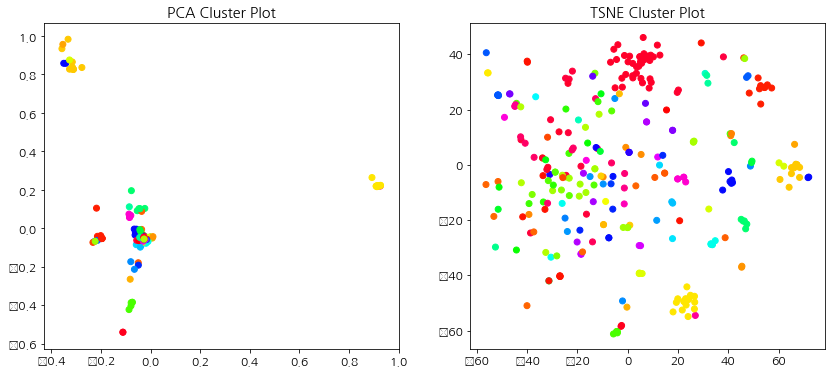

In [102]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [103]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        if i%10 == 0:
            print('\nCluster {}'.format(i))
            print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
가족,스릴러,마블,한국영화,sf,애니메이션,영화추천,영화후기,브런치무비패스,영화리뷰

Cluster 10
고민,회사생활,창업,백수,직장생활,직장,이직,직장인,회사,퇴사

Cluster 20
아이,부모,학습법,공부법,학원,독서,학교,대학,교육,공부

Cluster 30
뉴욕,해외여행,사진에세이,기록,감성에세이,일상,카메라,에세이,여행,사진

Cluster 40
당신,사람,엄마,소설,감성,결혼,마음,에세이,감성에세이,사랑

Cluster 50
방치,방송국,방식,방어,방송작가,힙합,겨울,바람,슬픔,세상

Cluster 60
대통령,한국어,투표,민주주의,선거,우리말,우리,아파트,국어,정치

Cluster 70
서비스,고객,브랜딩,포토에세이,영업,고통,사진에세이,경찰,노동,가죽공예

Cluster 80
방송국,방송,방사능,방비엥,방콕여행,가을방학,아울렛,감성,온천,독일여행

Cluster 90
신문,힙합,상황,의지,도피,행동,핑계,이해,시간,변명

Cluster 100
수능,소리,카메라,러시아,모바일,팟캐스트,북리뷰,취미,대학,서울

Cluster 110
방송국,실망,단어,생각,싸움,이해,본질,가치관,차이,사랑

Cluster 120
빈집,문화예술,젠트리피케이션,문화공간,재생,재개발,서울시,도시재생사업,도시,도시재생

Cluster 130
고양이사진,입양,유기견,집사,반려묘,동물,반려견,강아지,고양이,반려동물

Cluster 140
궁합,친구,연애,은하수,신화,우주,별자리운세,천문학,밤하늘,별자리

Cluster 150
화산,아프리카,트래블라인싱가포르,다이빙,인도네시아,포토에세이,감성에세이,사진에세이,사진,세계여행

Cluster 160
감성,만화,감성에세이,사랑,육아,브런치북,웹툰,여행,일러스트,그림

Cluster 170
소통,미래,육아,일상기록,미디어교육,코딩교육,일상,산업혁명,어린이,교육

Cluster 180
베트남,프로젝트,서귀포,발리,운영,세계여행,치앙마이,쉐어하우스,커뮤니티,디지털노마드

Cluster 190
캠페인,커리어,디자인,마케

### Spherical K means

우리 데이터의 keyword_list 의 경우 sparse하다. 기존 sklearn패키지의 Kmeans는 Euclidean distance를 사용하는데, 이 방법은 벡터의 길이에 영향을 받기 때문에 고차원 데이터에는 적합하지 않다. 따라서 이 대신 cosine distance, 1-cosine similarity를 적용해 이 문제를 해결할 수 있다.

그리고 앞에서 보았듯, 특정 keyword의 빈도수가 굉장히 높은 것을 알 수 있다. PPMI?

참고: https://lovit.github.io/nlp/machine%20learning/2018/10/16/spherical_kmeans/

In [249]:
from soyclustering import SphericalKMeans
spherical_kmeans = SphericalKMeans(
    n_clusters=300,
    max_iter=10,
    verbose=1,
    init='similar_cut'
)

labels = spherical_kmeans.fit_predict(text)

initialization_time=0.283127 sec, sparsity=0.000207
n_iter=1, changed=400203, inertia=464801.725, iter_time=3.878 sec, sparsity=0.0613
n_iter=2, changed=143924, inertia=391315.313, iter_time=3.704 sec, sparsity=0.0825
n_iter=3, changed=75225, inertia=371637.739, iter_time=3.642 sec, sparsity=0.0914
n_iter=4, changed=40671, inertia=365434.951, iter_time=3.797 sec, sparsity=0.0942
n_iter=5, changed=25741, inertia=361447.659, iter_time=3.818 sec, sparsity=0.0952
n_iter=6, changed=18085, inertia=359454.835, iter_time=3.767 sec, sparsity=0.0957
n_iter=7, changed=13402, inertia=357767.980, iter_time=3.884 sec, sparsity=0.096
n_iter=8, changed=9834, inertia=356946.842, iter_time=3.789 sec, sparsity=0.0962
n_iter=9, changed=7790, inertia=355896.940, iter_time=3.575 sec, sparsity=0.0963
n_iter=10, changed=6974, inertia=355512.115, iter_time=3.649 sec, sparsity=0.0965


/Users/seungmi/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungmi/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


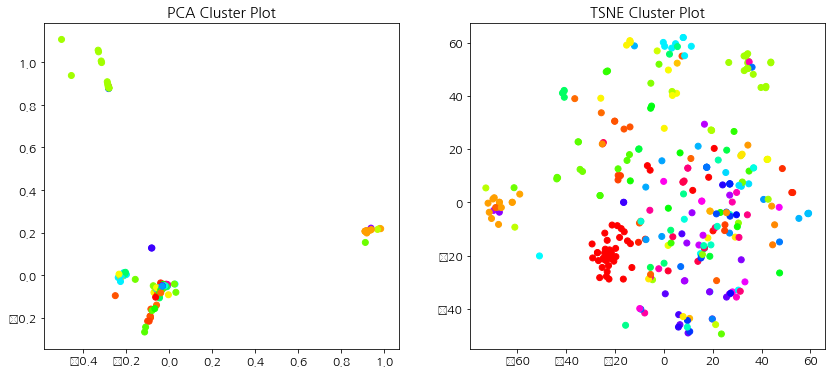

In [250]:
plot_tsne_pca(text, labels)

In [251]:
atc['cluster'] = labels

In [252]:
def get_top_keywords_spherical(data, clusters):
    df = pd.DataFrame(data.groupby(clusters)['keyword_list'].agg(sum))
    for i,r in df.iterrows():
        if i%10 == 0:
            print('\nCluster {}'.format(i))
            rtn = r.apply(lambda x: pd.Series(x.split()).value_counts()).sum().head(10)
            print(",".join(rtn.index))
            

In [253]:
get_top_keywords_spherical(atc, 'cluster')


Cluster 0
교육,가을,시,감성,문학,추억,감성글,필사,바람,시인

Cluster 10
아이,부모,아이아이,부모아이,아이부모,자녀교육,자녀,사춘기,부모교육,아빠

Cluster 20
레시피,레시피레시피,홈베이킹,베이킹,토마토,요리에세이,반찬,음식,다이어트,치즈

Cluster 30
대통령,문재인,선거,대선,투표,대통령문재인,노무현,박근혜,총선,안철수

Cluster 40
이야기,하늘,이야기하늘,구름,이야기이야기,하늘하늘,하늘이야기,이브,바람,이야기구름

Cluster 50
마음,마음마음,마음사랑,사랑,생각,에세이,마음생각,행복,감정,마음행복

Cluster 60
엄마,엄마엄마,육아,아이,사랑,육아엄마,아빠,엄마육아,사랑엄마,아들

Cluster 70
개발자,코딩,프로그래밍,인터넷,소프트웨어,개발자개발자,컴퓨터,프로그래머,노트북,c언어

Cluster 80
일상,일상일상,에세이,생각,일기,일상에세이,여행,에세이일상,행복,일상여행

Cluster 90
보안,해킹,보안프로젝트,보안보안프로젝트,보안보안,개인정보,악성코드,업데이트,온라인,정보보안

Cluster 100
소설,소설소설,문학,문학소설,시,단편소설,문학시,단편,서평,연재소설

Cluster 110
전원주택,목조주택,홈트리오,집짓기,집짓기전원주택,목조주택전원주택,단독주택,건축가,홈트리오전원주택,전원주택전원주택

Cluster 120
막걸리,소주,전통주,동생,술,음주,언니,술자리,청주,발효

Cluster 130
요가,명상,신용카드,운동,카드,감성글,신용카드추천,화장실,호흡,업무

Cluster 140
우리말,공무원,국어,한글,공무원국어,한국어,국어국어,한국어국어,바라기,한국사

Cluster 150
한강,채식,집밥,비건,김치,채식주의자,제철음식,감자,된장,김장

Cluster 160
나이,어른,중년,세월,어른나이,나이나이,나이어른,마흔,주름,나이중년

Cluster 170
이별,연애,이별이별,감성에세이이별,감성에세이,이별연애,연애이별,시,추억,그리움

Cluster 180
우울,불안,우울증,의미,기분,

**클러스터별(카테고리로 사용할 계획) 탑 키워드를 뽑았을 때 위의 기존 Kmeans랑 비교해보면 꽤 속성이 비슷한 애들끼리 묶이는 걸 눈으로 확인할 수 있음<br> 그리고 keyword가 8만개정도니까 cluster 갯수를 더 늘려도 괜찮을 듯**

## articles without any keyword?

In [266]:
atc.loc[atc['keyword_list'] == ""].shape

(70065, 13)

In [268]:
atc.loc[atc['keyword_list'] == ""].head()

,magazine_id,author_id,title,keyword_list,display_url,sub_title,reg_ts,id,article_id,reg_datetime,reg_dt,type,cluster
2,0,@hannahajink,무엇을 위해,,https://brunch.co.kr/@hannahajink/4,무엇 때문에,1447997287000,4,@hannahajink_4,2015-11-20 14:28:07,2015-11-20,개인,0
18,4104,@roke,고백하지 못할 고백,,https://brunch.co.kr/@roke/70,My darling child,1455431436000,70,@roke_70,2016-02-14 15:30:36,2016-02-14,매거진,0
29,11698,@pencil-k,[작심361일차] 건너뛰기,,https://brunch.co.kr/@pencil-k/478,D-4,1499672775000,478,@pencil-k_478,2017-07-10 16:46:15,2017-07-10,매거진,0
43,1729,@skyzakard,촉촉한 눈시울로 '내 삶'을 돌아봤습니다...,,https://brunch.co.kr/@skyzakard/73,"개인의 눈으로 바라본 1차 세계대전, <발리언트 하츠: 더 그레이트 워",1446125947000,73,@skyzakard_73,2015-10-29 22:39:07,2015-10-29,매거진,0
47,4542,@sooband,학교의 진화 다큐 OST 작업기,,https://brunch.co.kr/@sooband/60,,1449730053000,60,@sooband_60,2015-12-10 15:47:33,2015-12-10,매거진,0


In [271]:
7/64*100

10.9375

대략 7만개의 (10%) article이 키워드를 갖고있지 않음. 포스팅을 확인해보니 그냥 작가가 설정을 안한 경우 or 글의 본문이 굉장히 짧은 경우가 존재. <br>
전자의 경우 keyword extraction으로 해결하고 후자의 경우는 아예 추천할 필요가 있을까? 라는 생각


아니면 해당 작가의 이전 글들 keyword 따라가도 될 것 같고

## Load Contents


암호화되어있어서 keyword extraction을 할 수는 없을 것 같고,
본문 길이가 지나치게 짧은 애들은 거를 수 있을 듯

아니다... 이미지 파일로 올리는 작가들도 많아...<br>
근데 그 노고를 생각하면 이미지 파일로 올리는 작가들은 게시글 한두개만 쓰는건 아닐테고. 몇개이상 포스팅한 작가들은 제외해도?

In [272]:
contents6 = pd.read_json(directory + '/contents/data.6', lines=True)

In [284]:
contents6[contents6.chars.apply(len) < 5]

,chars,morphs,id
50,[],[],@happy-snowman_54
51,[],[],@yspecial_66
53,[],[],@happy-snowman_55
97,"[[438/SS, 485/SL, 441/SS, 483+172+172/SL], [17...","[[575/SS, 5131/SL, 583/SS, 2236/SL], [9411/SL]...",@kyutofu_94
153,[],[],@happy-snowman_56
...,...,...,...
42029,[],[],@bluechamber_213
42085,[],[],@choeyulla_16
42114,"[[383/SW], [383/SW], [383/SW]]","[[437/SW], [437/SW], [437/SW]]",@youjinlee4p6f_727
42138,"[[383/SW], [383/SW], [383/SW]]","[[437/SW], [437/SW], [437/SW]]",@dprnrn234_279


##  real "active" users

**6개월간 몇 번 이상 방문한 유저들을 진짜 "active"한 유저라고 할 수 있을까?** <br>


75% 유저가 주어진 6개월 기간동안 7회 이하 방문. 일단 얘네만 갖고 해보기

In [286]:
# grp_by_user.loc[grp_by_user['visit_day_cnt'] >=7, 'user_id']
# off_data_u = off_data[off_data.user_id.isin(upp_visit_user)]

In [305]:
uratings = off_data_u.groupby(['user_id','article_id']).size().reset_index(name = "views")

In [295]:
print(read_raw.article_id.nunique()) # 50만
print(off_data_u.article_id.nunique()) # 29만

505841
293340


In [306]:
uratings.head()

,user_id,article_id,views
0,#000fe61478d384d09f3bcdd0c2f5227d,@bisanggom_39,2
1,#000fe61478d384d09f3bcdd0c2f5227d,@blade31_216,2
2,#000fe61478d384d09f3bcdd0c2f5227d,@blade31_221,2
3,#000fe61478d384d09f3bcdd0c2f5227d,@blade31_222,2
4,#000fe61478d384d09f3bcdd0c2f5227d,@blade31_45,1
